<a href="https://colab.research.google.com/github/SaurabhSRP/02-Recommendation-System-Projects/blob/main/Movies_Recommendation_System_(Content_based_filtering_using_Corelation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [138]:
column_name=['user_id','item_id','rating','timestamp']

df=pd.read_csv('/content/drive/MyDrive/datasets/Recommendation system  dataset/MovieRecom/Movie_id_data1.data',sep='\t',names=column_name)
df.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [139]:
movie_titles=pd.read_csv("/content/drive/MyDrive/datasets/Recommendation system  dataset/MovieRecom/Movie_Id_Titles1")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [140]:
df=pd.merge(df,movie_titles,on='item_id')
df.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


#**EDA**

In [141]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [142]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [143]:
df_ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [144]:
df_ratings['total_rating_count']=pd.DataFrame(df.groupby('title')['rating'].count())
df_ratings.head()

,rating,total_rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


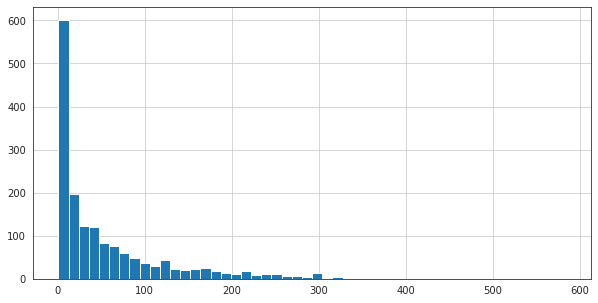

In [145]:
plt.figure(figsize=(10,5))
df_ratings['total_rating_count'].hist(bins=50)

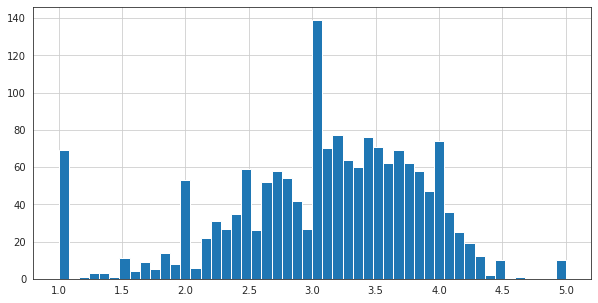

In [146]:
plt.figure(figsize=(10,5))
df_ratings['rating'].hist(bins=50)

<Figure size 720x720 with 0 Axes>

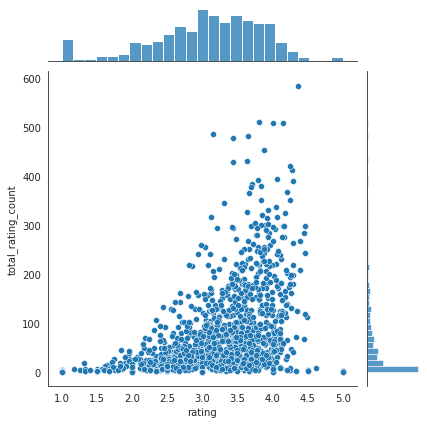

In [147]:
plt.figure(figsize=(10,10))
sns.jointplot(x='rating',y='total_rating_count',data=df_ratings)

#**Pivot table --> user_id vs Titles**

In [148]:
movie_pivot=df.pivot_table(index='user_id',columns='title',values='rating')
movie_pivot

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Lets find the corelation between df_rating and movie_pivot**

In [149]:
df_ratings.sort_values('total_rating_count',ascending=False).head()

,rating,total_rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


###Lets consider a movie , and find its corelation with respect to our movie_pivot

In [150]:
scifi_movie=movie_pivot['20,000 Leagues Under the Sea (1954)']


In [151]:
similar_to_scifi_movie=movie_pivot.corrwith(scifi_movie)

In [152]:
similar_to_scifi_movie

title
'Til There Was You (1997)                     NaN
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.266928
12 Angry Men (1957)                      0.274772
187 (1997)                                    NaN
                                           ...   
Young Guns II (1990)                    -0.518476
Young Poisoner's Handbook, The (1995)    0.623795
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

###We got our corelation values , lets sort it in descending order and drop all the NaN values 

In [153]:
corr_scifi_movie=pd.DataFrame(similar_to_scifi_movie,columns=['Corelation'])
corr_scifi_movie.dropna(inplace=True)
corr_scifi_movie.head()

,Corelation
title,
101 Dalmatians (1996),0.266928
12 Angry Men (1957),0.274772
2 Days in the Valley (1996),0.240966
"20,000 Leagues Under the Sea (1954)",1.000000
2001: A Space Odyssey (1968),0.259308


In [154]:
corr_scifi_movie.sort_values('Corelation',ascending=False).head(10)

,Corelation
title,
To Live (Huozhe) (1994),1.0
Blood For Dracula (Andy Warhol's Dracula) (1974),1.0
Strawberry and Chocolate (Fresa y chocolate) (1993),1.0
Before the Rain (Pred dozhdot) (1994),1.0
Heaven's Prisoners (1996),1.0
Bad Taste (1987),1.0
Afterglow (1997),1.0
Shall We Dance? (1996),1.0
Live Nude Girls (1995),1.0


###**But here we are missing a point , we arent considering on how many users provided rating to a specific movie , there could be a movie where rating is given by only one user , such data should be removed even when there is high corelation among them because it doesnt capture the user behaviour**

###We will fix that by keeping no. of user rating threshold 

In [155]:
corr_scifi_movie=corr_scifi_movie.join(df_ratings['total_rating_count'])
corr_scifi_movie.head()

,Corelation,total_rating_count
title,,
101 Dalmatians (1996),0.266928,109
12 Angry Men (1957),0.274772,125
2 Days in the Valley (1996),0.240966,93
"20,000 Leagues Under the Sea (1954)",1.000000,72
2001: A Space Odyssey (1968),0.259308,259


In [156]:
corr_scifi_movie[corr_scifi_movie['total_rating_count']>100].sort_values('Corelation',ascending=False).head()

,Corelation,total_rating_count
title,,
Scream 2 (1997),0.811093,106
True Romance (1993),0.697741,104
Ben-Hur (1959),0.637665,124
Kiss the Girls (1997),0.559017,143
Seven Years in Tibet (1997),0.553470,155


###**Our model is ready , now lets generalise the model by writing a function such that it should take movie name and give movie recommendation based on corelation value in descending value**

In [164]:
movie_num=input("Please type the movie title any index number between 0-1682\n")
movie_num=int(movie_num)
print("The movie name based on the index number given is : {}".format(movie_titles['title'][movie_num]))

x_movie=movie_pivot[movie_titles['title'][movie_num]]   #takes the name of the movie
corr_movie=movie_pivot.corrwith(x_movie)  #We corelated with our pivot table i.e movie_pivot
corr_movie_df=pd.DataFrame(corr_movie,columns=['Corelation']) #We convert that into a dataframe with column name 'corelation'
corr_movie_df.dropna(inplace=True) #drop all the NaN values
corr_movie_df.sort_values('Corelation',ascending=False).head(10) #Sort the  corelation values in descending order

##Now we will add the total user rating column and consider only those who have more than 50 user rating also sort values in descending order
print("Below are our top recommendation for you, Hope you enjoy it")
corr_movie_df=corr_movie_df.join(df_ratings['total_rating_count'])
corr_movie_df[corr_movie_df['total_rating_count']>50].sort_values('Corelation',ascending=False).head()


Please type the movie title any index number between 0-1682
12
The movie name based on the index number given is : Mighty Aphrodite (1995)
Below are our top recommendation for you, Hope you enjoy it


,Corelation,total_rating_count
title,,
Mighty Aphrodite (1995),1.000000,184
Deconstructing Harry (1997),0.664804,65
Some Kind of Wonderful (1987),0.650337,59
"Man Who Knew Too Little, The (1997)",0.613696,52
Lost Highway (1997),0.573827,125
